In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [37]:
res = pd.read_csv('results.csv').dropna().reset_index(drop=True)

<ipython-input-138-fec9f9c87a1f>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, text = axes_1d[ix].pie(row[labels].tolist(), colors=colors)


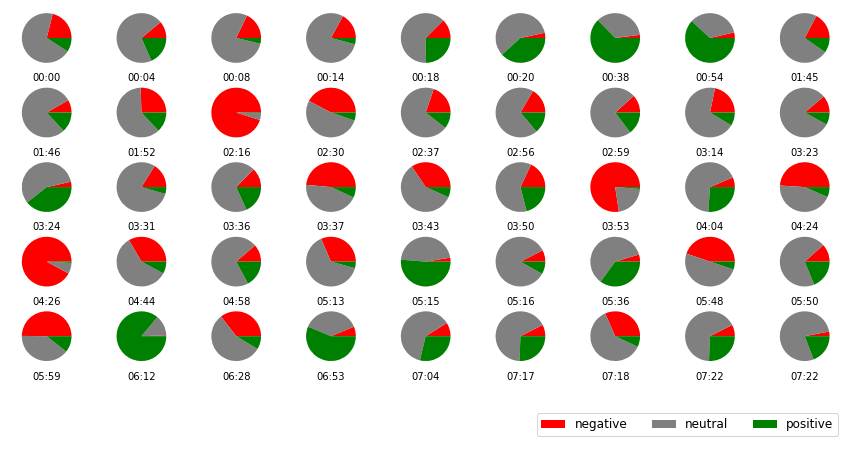

In [138]:
labels = ['negative', 'neutral', 'positive']
num_columns = 9                              
num_rows = 6
fig, axes = plt.subplots(num_rows,num_columns, figsize=(15,8), gridspec_kw=({'hspace':0.2}))

axes_1d = axes.ravel()
for ax in axes_1d[len(res):]:
    ax.set_axis_off()                                  
for ix, row in res.iterrows():
    patches, text = axes_1d[ix].pie(row[labels].tolist(), colors=colors)
    axes_1d[ix].set_xlabel(time.strftime('%M:%S', time.gmtime(row.start)))

plt.legend(patches, labels, loc='lower right',prop={'size': 12}, ncol=3)

/home/patryk_k/anaconda3/envs/ai_voice/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speaker', ylabel='duration'>

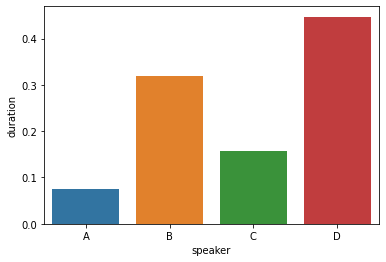

In [160]:
res['duration'] = res.end - res.start
dialogue_engagement = res.groupby('speaker').duration.sum()
dialogue_engagement = dialogue_engagement/dialogue_engagement.sum()
sns.barplot(dialogue_engagement.index, dialogue_engagement)